In [1]:
import pandas as pd
df = pd.read_excel('F:\CodingEnvironment\dvrpsd\chitam2.xlsx')

In [6]:
result = df.groupby(['ni sta', 'ni dyn']).agg({
    # 'rd': 'mean',
    'td': 'mean',
    'time': 'mean'
}).reset_index()

# Display the result
print(result)

    ni sta  ni dyn           td        time
0       10       5  1597.329775    9.784322
1       10      10  1553.831461   23.335288
2       10      20  1522.665070   68.898892
3       10      30  1506.671511  141.499507
4       20       5  1474.252046   10.560423
5       20      10  1474.538998   23.642007
6       20      20  1526.795620   70.571099
7       20      30  1508.278136  144.461799
8       50       5  1542.685813   17.754793
9       50      10  1558.084145   31.062851
10      50      20  1517.842311   77.551318
11      50      30  1474.596691  157.524511
12     100       5  1530.073155   41.203432
13     100      10  1502.430345   55.270080
14     100      20  1499.527930  104.826619
15     100      30  1494.579802  225.657341


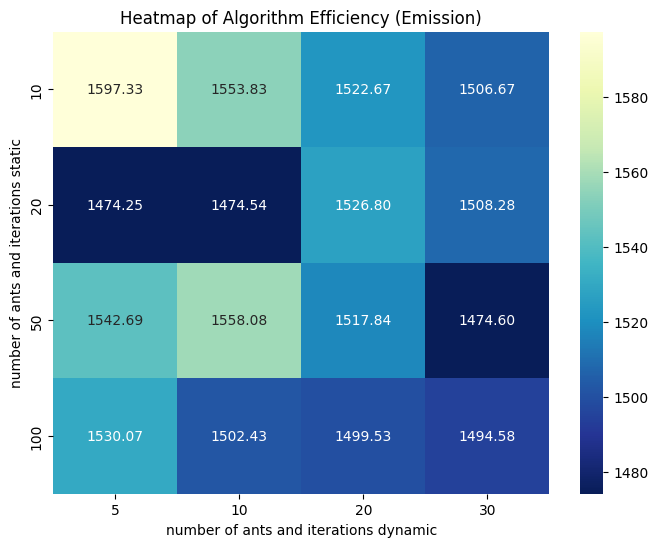

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'result' dataframe has 'file_name', 'ni_sta', 'ni_dyn', and 'average_time'
# Pivot the table to get a matrix form for heatmap
pivot_table = result.pivot(index='ni sta', columns='ni dyn', values='td')

# Draw the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu_r", fmt=".2f")
plt.title('Heatmap of Algorithm Efficiency (Emission)')
plt.xlabel('number of ants and iterations dynamic')
plt.ylabel('number of ants and iterations static')
plt.show()


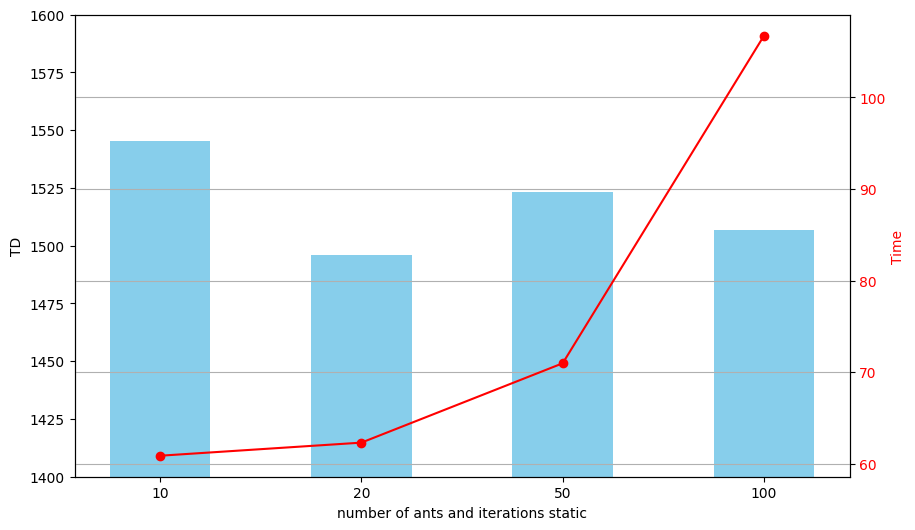

In [35]:
import matplotlib.pyplot as plt

# Grouping and aggregating the data
result_sta = result.groupby(['ni sta']).agg({
    'td': 'mean',
    'time': 'mean'
}).reset_index()

# Convert 'ni sta' to string type
result_sta['ni sta'] = result_sta['ni sta'].astype(str)

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting 'td' as bars on the left y-axis
ax1.bar(result_sta['ni sta'], result_sta['td'], color='skyblue', label='TD', width=0.5)  # Adjust width as needed
ax1.set_xlabel('number of ants and iterations static')
ax1.set_ylabel('TD', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Set specific y-axis range for the 'td' bar chart
ax1.set_ylim(1400, 1600) 

# Create another axis object for the right y-axis
ax2 = ax1.twinx()

# Plotting 'time' as a line on the right y-axis
ax2.plot(result_sta['ni sta'], result_sta['time'], color='red', marker='o', label='Time')
ax2.set_ylabel('Time', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title
# plt.title('Combined Bar and Line Chart (TD and Time)')

# Display the plot
plt.grid(True)
plt.show()


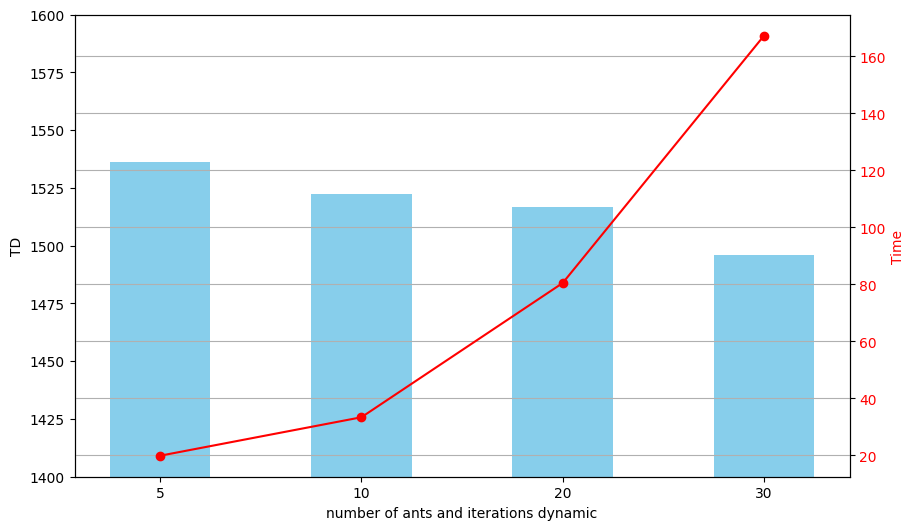

In [33]:
import matplotlib.pyplot as plt

# Grouping and aggregating the data
result_sta = result.groupby(['ni dyn']).agg({
    'td': 'mean',
    'time': 'mean'
}).reset_index()

# Convert 'ni sta' to string type
result_sta['ni dyn'] = result_sta['ni dyn'].astype(str)

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting 'td' as bars on the left y-axis
ax1.bar(result_sta['ni dyn'], result_sta['td'], color='skyblue', label='TD', width=0.5)  # Adjust width as needed
ax1.set_xlabel('number of ants and iterations dynamic')
ax1.set_ylabel('TD', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Set specific y-axis range for the 'td' bar chart
ax1.set_ylim(1400, 1600) 

# Create another axis object for the right y-axis
ax2 = ax1.twinx()

# Plotting 'time' as a line on the right y-axis
ax2.plot(result_sta['ni dyn'], result_sta['time'], color='red', marker='o', label='Time')
ax2.set_ylabel('Time', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title
# plt.title('Combined Chart (TD and Time)')

# Display the plot
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
barplot = pd.read_excel('F:\CodingEnvironment\dvrpsd\experiment\BarPlot.xlsx')
barplot.head()

,C1,C2,R1,R2,RC1,RC2
0,24.45,26.96,57.66,32.59,39.96,25.36
1,71.63,76.25,74.92,72.15,75.60,70.12
2,45.26,53.20,60.23,35.88,56.42,34.26
3,71.45,75.87,74.76,72.55,75.52,70.46
4,46.53,40.96,55.89,34.49,48.43,40.86


In [ ]:
barplot_melted = barplot.melt(var_name="Category", value_name="Value")
barplot_melted

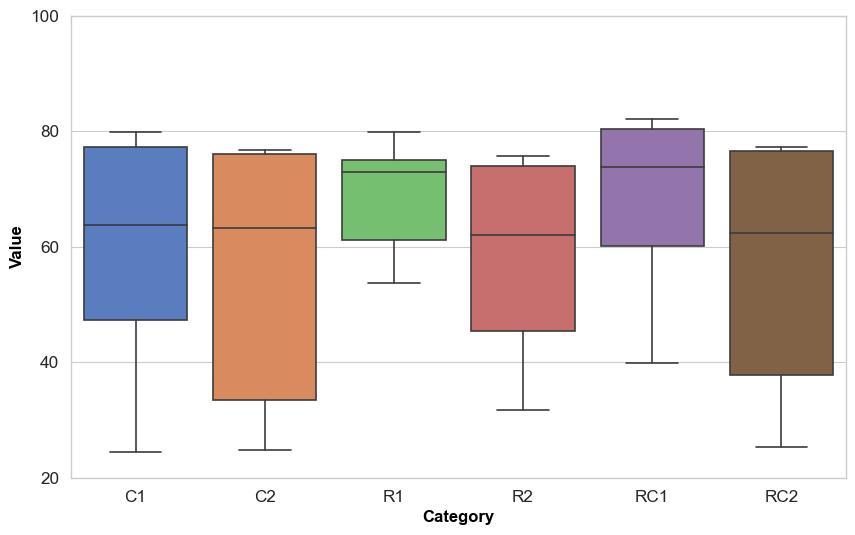

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Clean background for publications
sns.set_context("paper", font_scale=1.4)  # Adjust font size to suit academic papers
sns.set_palette("muted")  # Use muted color tones

# Plot with custom font and size
ax = sns.boxplot(data=barplot_melted, x="Category", y="Value")

# Customize labels and title
# plt.title("Boxplot of Values for Each Category", fontsize=14, color='black', fontweight='bold')
plt.xlabel("Category", fontsize=12, color='black', fontweight='bold')
plt.ylabel("Percentage Improvement (%)", fontsize=12, color='black', fontweight='bold')

plt.ylim(20, 100)  # Set y-axis range
plt.yticks(np.arange(20, 101, 20)) 

# Export as high-quality PDF
# plt.savefig("boxplot_paper_format.pdf", format='pdf', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [ ]:
import pandas as pd
combined_CP = pd.read_excel("F:\CodingEnvironment\dvrpsd\experiment\combined_full.xlsx")
combined_CP.head()

,file_name,ited,sized,td,rd,obj,time
0,h100c101.csv,5,5,1473.350182,0,0.054023,6.123789
1,h100c101.csv,5,5,1387.981942,0,0.050893,5.283890
2,h100c101.csv,5,5,1494.756457,0,0.054808,6.196696
3,h100c101.csv,5,10,1664.483967,0,0.061032,8.449386
4,h100c101.csv,5,10,1511.337548,0,0.055416,8.711607


In [ ]:
cp_merge = combined_CP.groupby(['ited','sized']).agg({
    'obj': 'mean',
    'time': 'mean'
    
}).reset_index()

# Display the result
cp_merge.head()

,ited,sized,obj,time
0,5,5,0.053904,54.104707
1,5,10,0.054290,68.825230
2,5,20,0.054039,98.603970
3,5,30,0.054360,128.819870
4,10,5,0.053600,99.454968


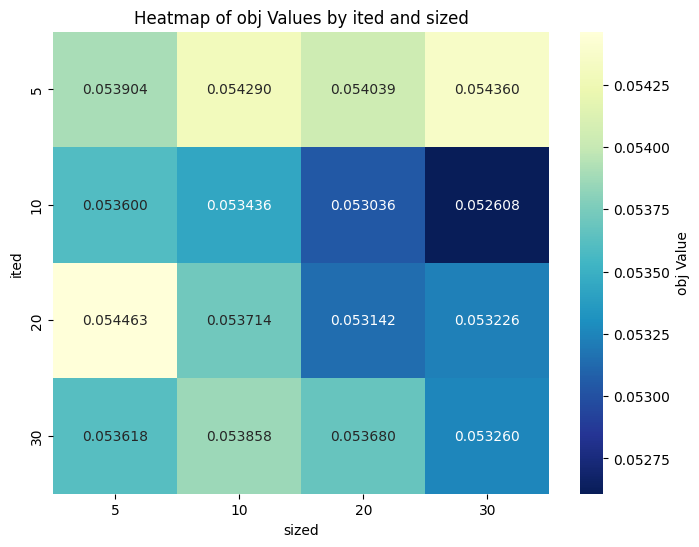

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to format it for the heatmap
heatmap_data = cp_merge.pivot(index="ited", columns="sized", values="obj")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".6f", cmap="YlGnBu_r", cbar_kws={'label': 'obj Value'})
plt.title("Heatmap of obj Values by ited and sized")
plt.xlabel("sized")
plt.ylabel("ited")
plt.show()

In [1]:
import pandas as pd
import seaborn as sns
df_100 = pd.read_csv("F:\CodingEnvironment\dvrpsd\experiment\Instance_100.csv")
df_200 = pd.read_excel("F:\CodingEnvironment\dvrpsd\experiment\Instance_200.xlsx")
df_400 = pd.read_csv("F:\CodingEnvironment\dvrpsd\experiment\Instance_400.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add a 'source' column to each DataFrame
df_100['source'] = 'df_100'
df_200['source'] = 'result_full_200'
df_400['source'] = 'result_full_400'

# Function to extract category labels (specific for result_full_100 to handle lowercase)
def add_category_column_100(df):
    df['category'] = df['file_name'].str.extract(r'(c1|c2|r1|r2|rc1|rc2)', expand=False).str.upper()
    return df

# Function to extract category labels (for df_200 and df_400)
def add_category_column(df):
    df['category'] = df['file_name'].str.extract(r'(C1|C2|R1|R2|RC1|RC2)', expand=False)
    return df

# Apply the function to each DataFrame
df_100 = add_category_column_100(df_100)
df_200 = add_category_column(df_200)
df_400 = add_category_column(df_400)

# Concatenate all DataFrames
combined_df = pd.concat([df_100, df_200])

# Filter out any rows without a valid category label
combined_df = combined_df.dropna(subset=['category'])

# Plot scatter plot with both category and source information

In [ ]:
# combined_df

,file_name,seed,td,rd,source,category,time
0,h100c101.csv,1,1644.701000,0,df_100,C1,NaN
1,h100c101.csv,2,1618.996000,0,df_100,C1,NaN
2,h100c101.csv,3,1664.792000,0,df_100,C1,NaN
3,h100c101.csv,4,1774.085000,0,df_100,C1,NaN
4,h100c101.csv,5,1557.864000,0,df_100,C1,NaN
...,...,...,...,...,...,...,...
195,h200RC2_2_8.csv,2,4397.920314,-100,df_200,RC2,653.576034
196,h200RC2_2_8.csv,3,4370.900441,-100,df_200,RC2,635.416947
197,h200RC2_2_9.csv,1,3900.191587,-100,df_200,RC2,681.315069
198,h200RC2_2_9.csv,2,4046.587435,-100,df_200,RC2,649.910878


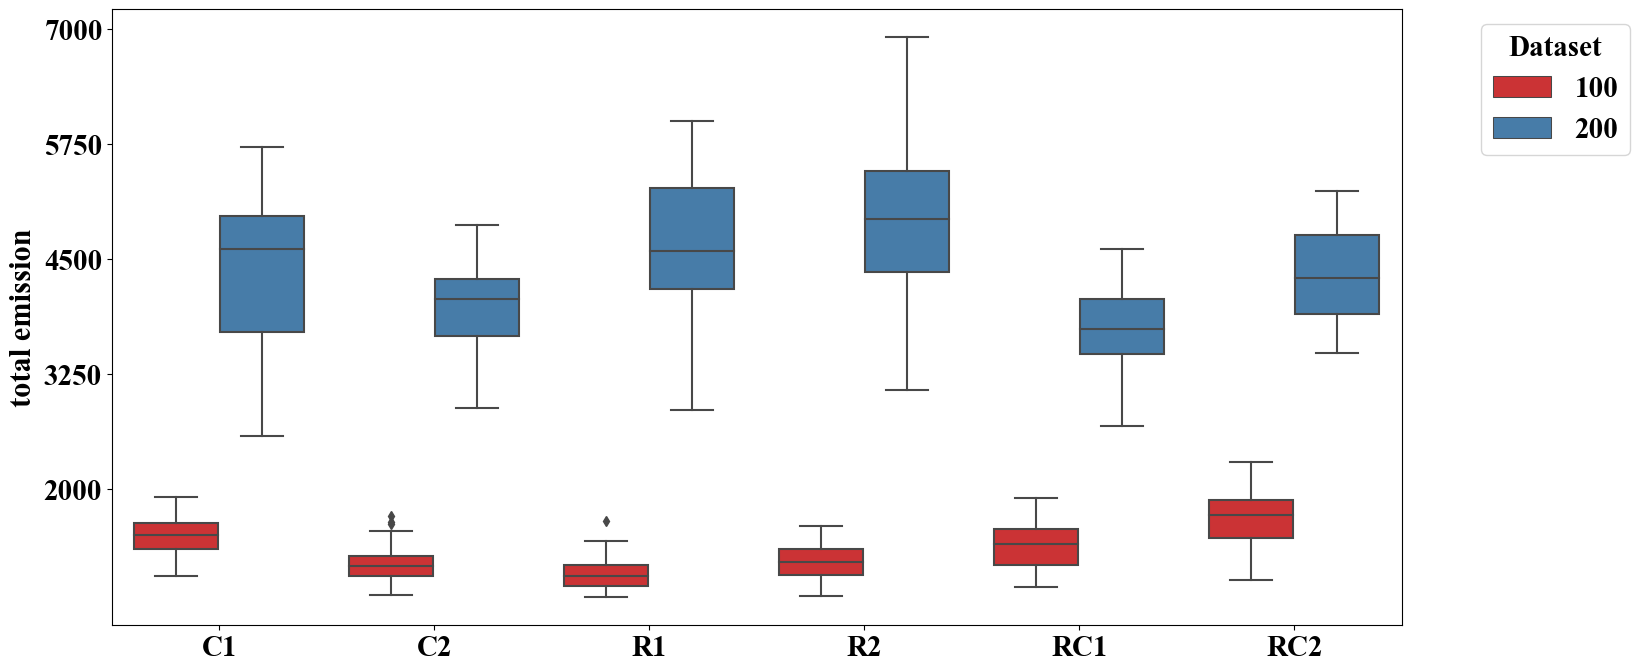

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the font family globally to Times New Roman and increase the font size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 21  # Adjust this for the desired font size
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df, x='category', y='td', hue='source', palette="Set1")
plt.ylabel('total emission', fontsize=22, fontweight = 'bold')  # Increase font size of y-axis label
plt.xlabel('', fontsize=22, fontweight = 'bold')   # Increase font size of x-axis label


# y_min, y_max = plt.gca().get_ylim()  # Get the current y-axis limits
y_min = 2000
y_max = 7000
plt.yticks(np.linspace(y_min, y_max, 5))  

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Define custom labels
custom_labels = ['100','200']

# Update the legend with custom labels
legend = plt.legend(handles, custom_labels, title='Dataset', fontsize=21, bbox_to_anchor=(1.05, 1), loc='upper left')
# legend.get_title().set_fontsize(18)  # Set the title font size
# legend.get_title().set_fontweight('bold')  # Set the title font weight

plt.subplots_adjust(right=1.2)

plt.savefig("TD_boxplot_100_200.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()


In [9]:
print(df_100)

         file_name  seed           td  rd  source category
0     h100c101.csv     1  1644.701000   0  df_100       C1
1     h100c101.csv     2  1618.996000   0  df_100       C1
2     h100c101.csv     3  1664.792000   0  df_100       C1
3     h100c101.csv     4  1774.085000   0  df_100       C1
4     h100c101.csv     5  1557.864000   0  df_100       C1
..             ...   ...          ...  ..     ...      ...
555  h100rc208.csv     6  1561.058032   0  df_100      RC2
556  h100rc208.csv     7  1288.672979   0  df_100      RC2
557  h100rc208.csv     8  1556.546833   0  df_100      RC2
558  h100rc208.csv     9  1283.394046   0  df_100      RC2
559  h100rc208.csv    10  1349.815271   0  df_100      RC2

[560 rows x 6 columns]


In [11]:
df_400["rd"] = df_400['rd'] + 300
result = df_400.groupby(['category']).agg({
    'rd': 'mean',
}).reset_index()
result

,category,rd
0,C1,0.280000
1,C2,0.043478
2,R1,1.500000
3,R2,0.076923
4,RC1,0.300000
5,RC2,0.000000


In [56]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("F:\CodingEnvironment\dvrpsd\experiment\compare_algorithms_200_400.csv")

In [57]:
def add_category_column_100(df):
    df['category'] = df['file_name'].str.extract(r'(c1|c2|r1|r2|rc1|rc2)', expand=False).str.upper()
    return df

# Function to extract category labels (for df_200 and df_400)
def add_category_column(df):
    df['category'] = df['file_name'].str.extract(r'(C1|C2|R1|R2|RC1|RC2)', expand=False)
    return df

# Apply the function to each DataFrame
df = add_category_column_100(df)

# # Concatenate all DataFrames
# combined_df = pd.concat([df_100, df_200])

# # Filter out any rows without a valid category label
combined_df = combined_df.dropna(subset=['category'])

# # Plot scatter plot with both category and source information

In [58]:
df

,algorithm,file_name,seed,td,rd,time,Unnamed: 6,Unnamed: 7,category
0,inferv3,h400C1_4_1.csv,1,9866.731263,4,1463.348356,NaN,NaN,NaN
1,inferv3,h400C1_4_1.csv,2,9294.383867,7,1501.378770,NaN,NaN,NaN
2,inferv3,h400C1_4_1.csv,3,9895.415491,0,1426.287328,NaN,NaN,NaN
3,inferv3,h400R1_4_1.csv,1,10881.089210,0,926.690882,NaN,NaN,NaN
4,inferv3,h400R1_4_1.csv,2,11609.771840,0,910.454045,NaN,NaN,NaN
5,inferv3,h400R1_4_1.csv,3,10555.116040,1,927.903003,NaN,NaN,NaN
6,inferv3,h400RC1_4_1.csv,1,9210.620314,7,723.558814,NaN,NaN,NaN
7,inferv3,h400RC1_4_1.csv,2,9251.528230,0,704.356680,NaN,NaN,NaN
8,inferv3,h400RC1_4_1.csv,3,8719.441115,6,721.164101,NaN,NaN,NaN
9,inferv3,h400C2_4_1.csv,1,8057.272080,0,3597.884231,NaN,NaN,NaN


In [73]:
# import re
ub1 = pd.read_csv(r'F:\CodingEnvironment\dvrpsd\experiment\upper_bound_200.csv')

ub1['data_path'] = ub1['data_path'].str.replace(r'0*(RC|C|R)', r'h200\1', regex=True)

ub1.head()
# import re
ub = pd.read_csv(r'F:\CodingEnvironment\dvrpsd\experiment\upperbound_400_100.csv')

ub['data_path'] = ub['data_path'].str.replace(r'0*(RC|C|R)', r'h400\1', regex=True)

ub.head()

,data_path,num_vehicle,carbon_upper,reject_upper
0,h400C1_4_1.csv,100,131933.440446,401
1,h400C1_4_10.csv,100,131933.440446,401
2,h400C1_4_2.csv,100,131933.440446,401
3,h400C1_4_3.csv,100,131933.440446,401
4,h400C1_4_4.csv,100,131933.440446,401


In [74]:
merged = pd.merge(df, ub, left_on='file_name', right_on='data_path')
print(merged.head)
merged['obj'] = (merged['td'] / merged['carbon_upper'] + merged['rd'] / merged['reject_upper'])/2

# Select the required columns for the new DataFrame
new_df = merged[['algorithm','file_name', 'td', 'rd', 'obj', 'time']].copy()
new_df.head()

merged1 = pd.merge(df, ub1, left_on='file_name', right_on='data_path')
print(merged1.head)
merged1['obj'] = (merged1['td'] / merged1['carbon_upper'] + merged1['rd'] / merged1['reject_upper'])/2

# Select the required columns for the new DataFrame
new_df1 = merged1[['algorithm','file_name', 'td', 'rd', 'obj', 'time']].copy()
new_df1.head()

<bound method NDFrame.head of    algorithm        file_name  seed            td  rd         time  \
0    inferv3   h400C1_4_1.csv     1   9866.731263   4  1463.348356   
1    inferv3   h400C1_4_1.csv     2   9294.383867   7  1501.378770   
2    inferv3   h400C1_4_1.csv     3   9895.415491   0  1426.287328   
3    inferv2   h400C1_4_1.csv     1   8891.443162   0   884.238659   
4    inferv2   h400C1_4_1.csv     2   9348.138622   2   906.677855   
5    inferv2   h400C1_4_1.csv     3   9481.125222   0   872.324807   
6    inferv3   h400R1_4_1.csv     1  10881.089210   0   926.690882   
7    inferv3   h400R1_4_1.csv     2  11609.771840   0   910.454045   
8    inferv3   h400R1_4_1.csv     3  10555.116040   1   927.903003   
9    inferv2   h400R1_4_1.csv     1  10770.374450   1   567.906647   
10   inferv2   h400R1_4_1.csv     2  11402.572680   0   558.575319   
11   inferv2   h400R1_4_1.csv     3  11998.220470   0   533.905760   
12   inferv3  h400RC1_4_1.csv     1   9210.620314   7   723.

,algorithm,file_name,td,rd,obj,time
0,inferv3,h200C1_2_1.csv,4615.072786,0,0.046652,233.925861
1,inferv3,h200C1_2_1.csv,3975.325049,0,0.040185,233.079927
2,inferv2,h200C1_2_1.csv,4434.091469,1,0.047310,249.434959
3,inferv2,h200C1_2_1.csv,4453.413117,2,0.049993,245.735030
4,inferv3,h200R1_2_1.csv,5201.287582,4,0.061705,136.041360


In [75]:
result = new_df.groupby(['algorithm','file_name']).agg({
    'obj': 'mean',
}).reset_index()

In [77]:
result1 = new_df1.groupby(['algorithm','file_name']).agg({
    'obj': 'mean',
}).reset_index()

In [78]:
result_full = pd.concat([result, result1], ignore_index=True)
result_full

,algorithm,file_name,obj
0,inferv2,h400C1_4_1.csv,0.035850
1,inferv2,h400C2_4_1.csv,0.033935
2,inferv2,h400R1_4_1.csv,0.040691
3,inferv2,h400R2_4_1.csv,0.045996
4,inferv2,h400RC1_4_1.csv,0.036080
5,inferv2,h400RC2_4_1.csv,0.035265
6,inferv3,h400C1_4_1.csv,0.041278
7,inferv3,h400C2_4_1.csv,0.033436
8,inferv3,h400R1_4_1.csv,0.039365
9,inferv3,h400R2_4_1.csv,0.041893


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract type and category from `file_name`
result_full['type'] = result_full['file_name'].str.extract(r'h(\d+)')[0]
result_full['category'] = result_full['file_name'].str.extract(r'(C\d|R\d|RC\d)')[0]

result_full.head()

,algorithm,file_name,obj,type,category
0,inferv2,h400C1_4_1.csv,0.035850,400,C1
1,inferv2,h400C2_4_1.csv,0.033935,400,C2
2,inferv2,h400R1_4_1.csv,0.040691,400,R1
3,inferv2,h400R2_4_1.csv,0.045996,400,R2
4,inferv2,h400RC1_4_1.csv,0.036080,400,RC1


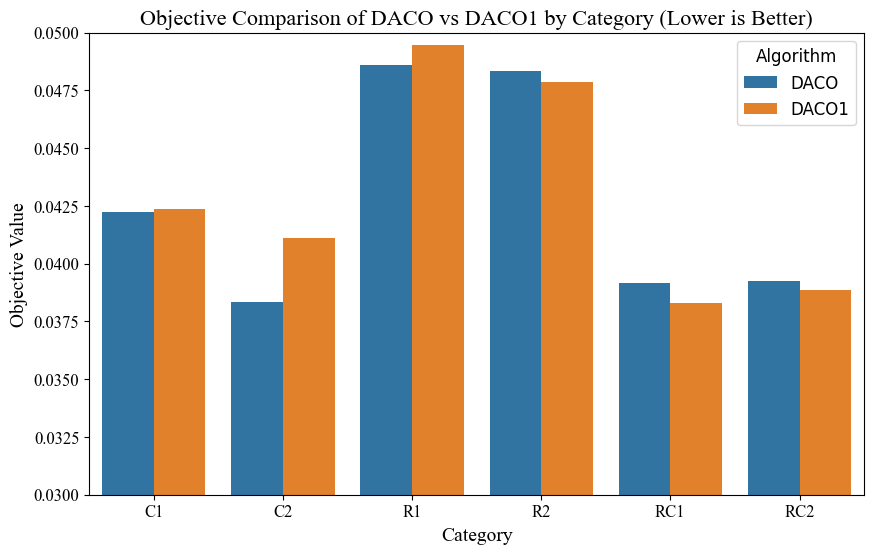

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming result_full contains your data
plt.figure(figsize=(10, 6))

# Bar plot with customizations
sns.barplot(data=result_full, x="category", y="obj", hue="algorithm", ci=None)
plt.title("Objective comparison of DACO vs DACO1", fontsize=16, fontname="Times New Roman")
plt.xlabel("Category", fontsize=14, fontname="Times New Roman")
plt.ylabel("Objective Value", fontsize=14, fontname="Times New Roman")

# Customize the legend
plt.legend(title="Algorithm", labels=["DACO", "DACO1"], fontsize=12, title_fontsize=12)

# Set y-axis range
plt.ylim(0.03, 0.05)

# Change font for tick labels
plt.xticks(fontsize=12, fontname="Times New Roman")
plt.yticks(fontsize=12, fontname="Times New Roman")

plt.show()


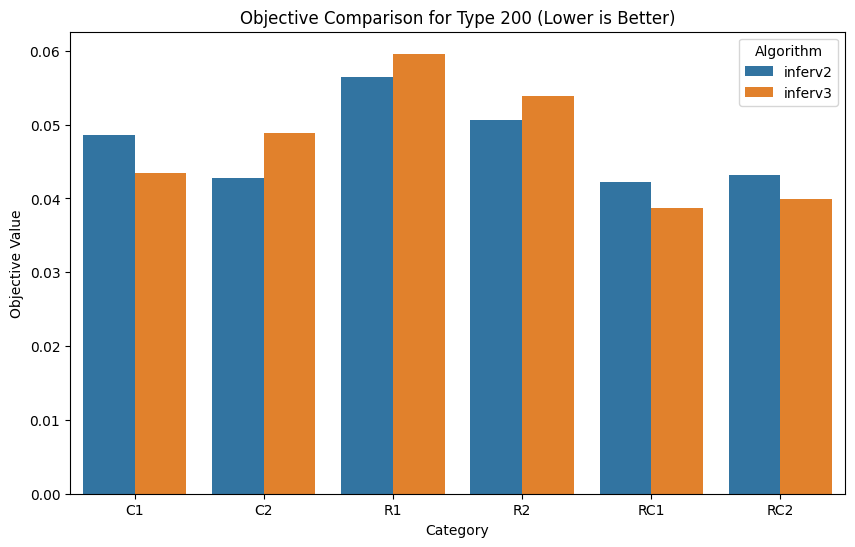

In [51]:
plt.figure(figsize=(10, 6))
df_200 = result_full[result_full['type'] == '200']
sns.barplot(data=df_200, x="category", y="obj", hue="algorithm", ci=None)
plt.title("Objective Comparison for Type 200 (Lower is Better)")
plt.xlabel("Category")
plt.ylabel("Objective Value")
plt.legend(title="Algorithm")
plt.show()

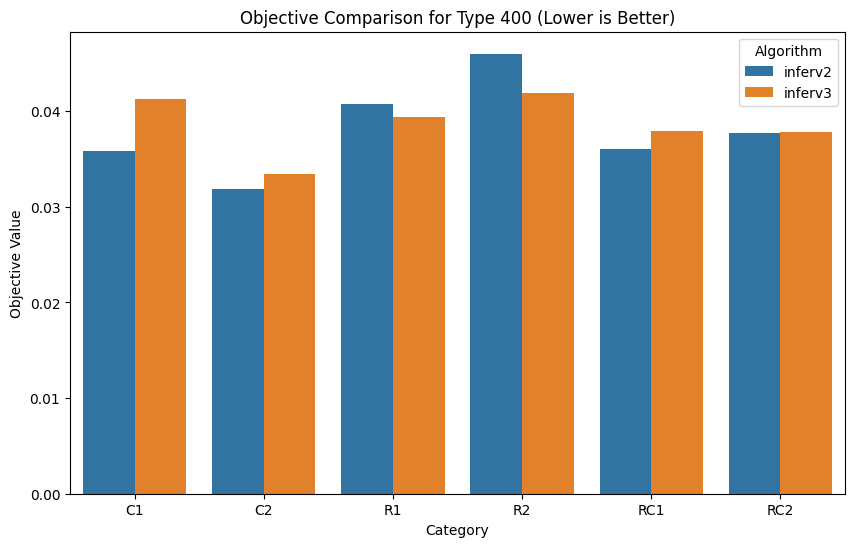

In [47]:

# Plot for type 400
plt.figure(figsize=(10, 6))
df_400 = result_full[result_full['type'] == '400']
sns.barplot(data=df_400, x="category", y="obj", hue="algorithm", ci=None)
plt.title("Objective Comparison for Type 400 (Lower is Better)")
plt.xlabel("Category")
plt.ylabel("Objective Value")
plt.legend(title="Algorithm")
plt.show()